In [2]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np 
import os
from electrical_data_process import * 
import matplotlib.ticker as ticker

In [3]:
m_1 = Measurments('sample_1.2c')
p_1 = Process_DC_IV(m_1.get_abspath())
d_1 = Draw_DC_IV(p_1, m_1)
#d_1.all()
m_1.contacts_list # написать отдельную функцию под этот вызов

{'L15-10',
 'L15-100',
 'L15-25',
 'L15-50',
 'L15-75',
 'O15-10',
 'O15-100',
 'O15-25',
 'O15-50',
 'O15-75',
 'test'}

In [4]:
L15_10_dict = m_1.get_contact_dict('L15-10')
L15_25_dict = m_1.get_contact_dict('L15-25')
L15_50_dict = m_1.get_contact_dict('L15-50')
L15_75_dict = m_1.get_contact_dict('L15-75')
L15_100_dict = m_1.get_contact_dict('L15-100')

L15_10_cuurents = p_1.get_on_off_current(L15_10_dict, 0.5)
L15_25_cuurents = p_1.get_on_off_current(L15_25_dict, 0.5)
L15_50_cuurents = p_1.get_on_off_current(L15_50_dict, 0.5)
L15_75_cuurents = p_1.get_on_off_current(L15_75_dict, 0.5)
L15_100_cuurents = p_1.get_on_off_current(L15_100_dict, 0.5)

L15_10_voltage = p_1.ReRAM_on_off_voltage(L15_10_dict)
L15_25_voltage = p_1.ReRAM_on_off_voltage(L15_25_dict)
L15_50_voltage = p_1.ReRAM_on_off_voltage(L15_50_dict)
L15_75_voltage = p_1.ReRAM_on_off_voltage(L15_75_dict)
L15_100_voltage = p_1.ReRAM_on_off_voltage(L15_100_dict)

contacts = ['L15-10', 'L15-25', 'L15-50', 'L15-75', 'L15-100' ]
contacts_dict = [L15_10_dict, L15_25_dict, L15_50_dict, L15_75_dict, L15_100_dict]
currents = [L15_10_cuurents, L15_25_cuurents, L15_50_cuurents, L15_75_cuurents, L15_100_cuurents]
voltages = [L15_10_voltage, L15_25_voltage, L15_50_voltage, L15_75_voltage, L15_100_voltage]

In [5]:
L15_10_voltage[1]

array([2. , 1.3, 1.1, 1.2, 1.2, 1.4, 1.3, 1.2, 1.1, 1.4, 1.1, 0.9, 1.4,
       1.3, 1.7, 1.6, 1.5, 1.4, 1.2, 1.1, 1.1, 1. , 1.3, 1.3, 1.3, 1. ,
       1.3, 1.3, 1.3, 1.2, 1.2, 1.2, 1.1, 1.8, 1.1, 1.3, 1.2, 1.1, 1.2,
       1.3, 1.2, 1.2, 1.1, 1.1, 1.3, 1.1, 1.2, 1.1, 1.3, 1.2, 1.2])

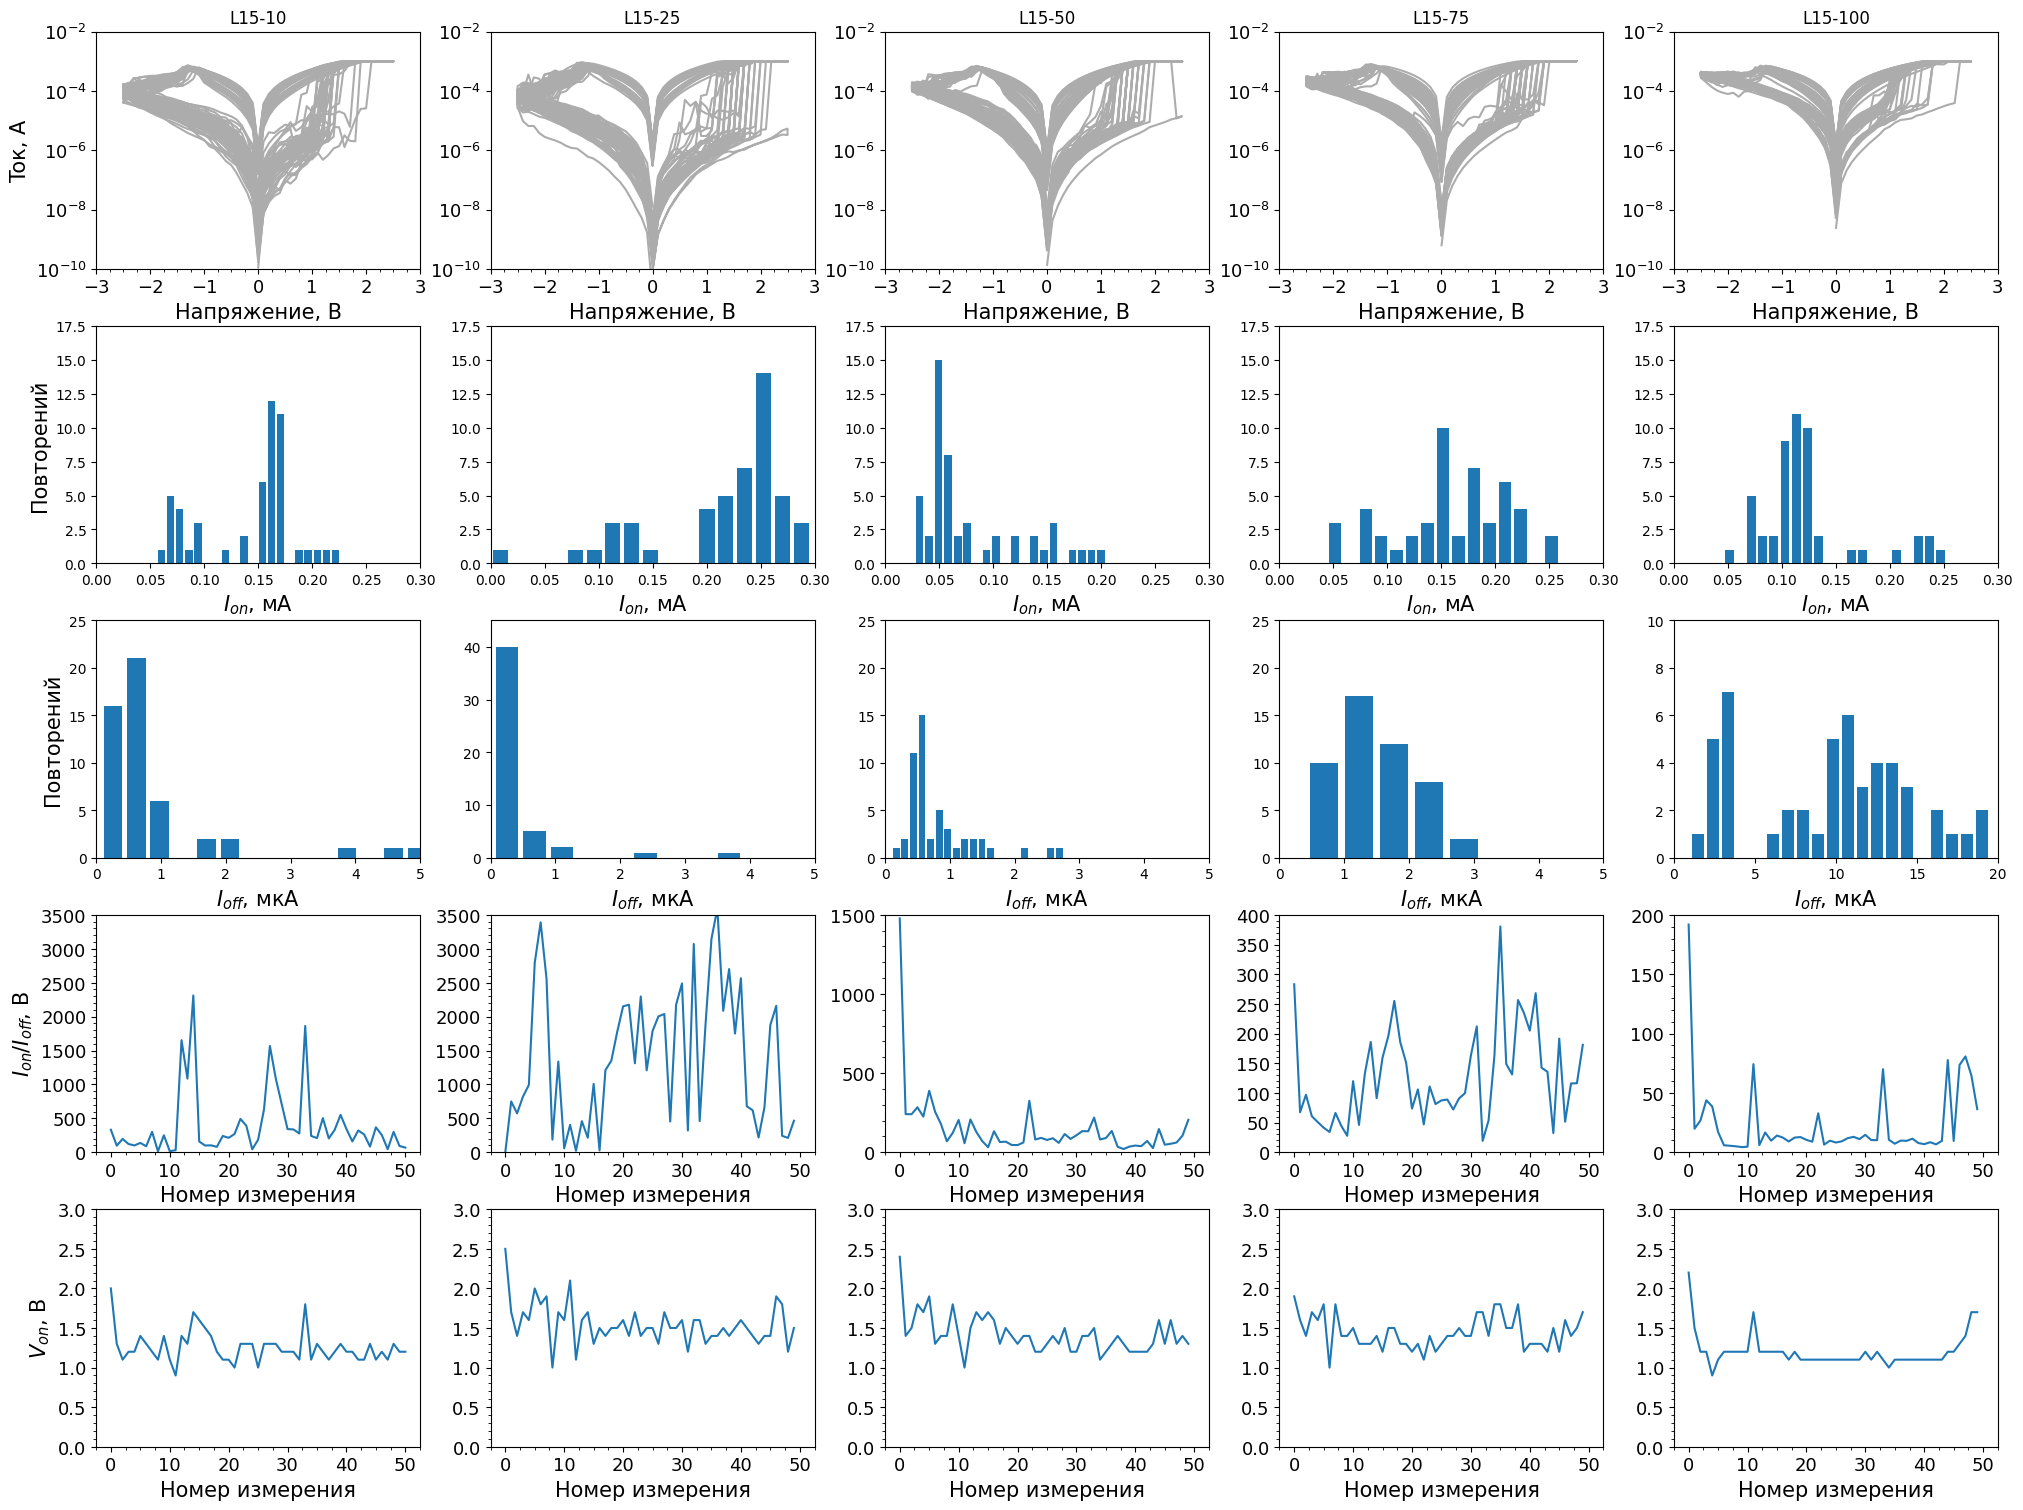

In [12]:
fig, ax = plt.subplots(figsize = [20, 15], nrows=5, ncols=5)
fig.tight_layout(pad=2)
for i in range(5):
    ax[0][i].set(yscale='log', ylim=(10**(-10), 10**(-2)), xlim= (-3, 3), title = contacts[i])
    ax[0][i].set_xlabel('Напряжение, В', size = 15)
    ax[0][i].tick_params(axis='both', labelsize = 13, grid_linewidth = 2)
    ax[0][0].set_ylabel('Toк, А', size = 15)
    ax[0][i].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[0][i].xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
    d_1.multiple(contacts_dict[i], ax[0][i])

    ax[1][i].hist(np.array(p_1.get_on_off_current(contacts_dict[i], 0.5)['I_on']) * 1000, bins = 20, rwidth = 0.8)
    ax[1][i].set(ylim=(0, 17.5), xlim= (0, 0.3))
    ax[1][i].set_xlabel(r'$I_{on}$, мА', size = 15)
    ax[1][0].set_ylabel('Повторений', size = 15)

    ax[2][i].hist(np.array(p_1.get_on_off_current(contacts_dict[i], 0.5)['I_off']) * 1000000, bins = 20, rwidth = 0.8)
    ax[2][i].set(ylim=(0, 25), xlim= (0, 5))
    ax[2][1].set(ylim=(0, 45), xlim= (0, 5))
    ax[2][4].set(ylim=(0, 10), xlim= (0, 20))
    ax[2][i].set_xlabel(r'$I_{off}$, мкА', size = 15)
    ax[2][0].set_ylabel('Повторений', size = 15)

    ax[3][i].plot(range(len(currents[i]['I_on_off'])), np.array(currents[i]['I_on_off']))
    ax[3][i].set_xlabel('Номер измерения', size = 15)
    ax[3][0].set_ylabel(r'$I_{on}/I_{off}$, В', size = 15)
    ax[3][i].tick_params(axis='both', labelsize = 13, grid_linewidth = 2)
    if i < 3:
        ax[3][i].yaxis.set_major_locator(ticker.MultipleLocator(500))
        ax[3][i].yaxis.set_minor_locator(ticker.MultipleLocator(100))
    else:
        ax[3][i].yaxis.set_major_locator(ticker.MultipleLocator(50))
        ax[3][i].yaxis.set_minor_locator(ticker.MultipleLocator(10))
    ax[3][i].xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax[3][i].xaxis.set_minor_locator(ticker.MultipleLocator(2.5))

    ax[3][0].set(ylim=(0, 3500), xlim= (-2.5, 52.5))
    ax[3][1].set(ylim=(0, 3500), xlim= (-2.5, 52.5))
    ax[3][2].set(ylim=(0, 1500), xlim= (-2.5, 52.5))
    ax[3][3].set(ylim=(0, 400), xlim= (-2.5, 52.5))
    ax[3][4].set(ylim=(0, 200), xlim= (-2.5, 52.5))


    ax[4][i].plot(range(len(voltages[i][1])), np.array(voltages[i][1]))
    ax[4][i].set(ylim=(0, 3), xlim= (-2.5, 52.5))
    ax[4][i].set_xlabel('Номер измерения', size = 15)
    ax[4][0].set_ylabel(r'$V_{on}$, В', size = 15)
    ax[4][i].tick_params(axis='both', labelsize = 13, grid_linewidth = 2)
    ax[4][i].xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax[4][i].xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
    ax[4][i].yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax[4][i].yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

plt.savefig('all_stat.png', dpi = 300, bbox_inches = 'tight')